## Observations and Insights 

In [ ]:
# Three observations or inferences that can be made from the data:
''' 
1. Effects on tumor size in mice was variable amongst treatments.
Analysis of the Box Plot generated from the four-treatment comparison 
indicates a greater decrease in tumor size for mice administered the 
drugs Capomulin and Ramicane. However, this data could be reflective 
of the fact that the Capomulin and Ramicane treatments also resulted
in a greater total number of timepoints in comparison to treatments 
such as Infubinol and Ceftamin (pandas & pyplot Bar Charts). 
Therefore, further analysis may need to be conducted in order to 
see if there is a true relationship of treatment used and tumor 
size or if the generated results were due to the greater number of 
timepoints recorded.

2. Analysis of the generated Line Chart for tumor size of a specific
mouse treated with the drug Capomulin indicates an 
effectiveness over time. However, this effectiveness was only 
demonstrated after the mouse had been administered the drug for at 
least 20 days. Prior to 20 days, tumor size continued to grow.
After 20 days of treatement, a sharp decline was shown unil ~day 35. 

3. A positive correlation (0.71) exists between mouse weight and the 
average tumor volume (mm3) for the Capomuloin Regimen. Meaning, as 
the mouses weight increases so does the average tumor volume for each
mouse. A theory could be formulated that heavier mice have a greater 
quantity of adipose tissue (fat). Greater quantities of adipose tissue 
permit tumor growth. Therefore, weight management could be key to 
helping reduce and retard tumor size. 
'''

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='left', on=["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [35]:
# Checking the number of mice.
total_number_mice = len(combined_data_df["Mouse ID"].unique())
total_number_mice

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combined_data_df[combined_data_df["Mouse ID"].duplicated()]
#combined_data_df["Mouse ID"].duplicated().sum()
#combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']).sum()
#combined_data_df.loc[combined_data_df.duplicated(), :]
combined_data_df.loc[combined_data_df[['Mouse ID', 'Timepoint']].duplicated(), :]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
#combined_data_df["Mouse ID"].loc["g989"]
#combined_data_df.loc[combined_data_df.Mouse ID == ‘g989’, :]
mouse_id_df = combined_data_df.set_index('Mouse ID')
mouse_id_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = combined_data_df.drop_duplicates(keep='first')
#cleaned_df
#cleaned_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
#cleaned_df
cleaned_df = mouse_id_df.drop(['g989'])
cleaned_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [39]:
# Checking the number of mice in the clean DataFrame.
#cleaned_total_number_mice = cleaned_df["Mouse ID"].unique()
new_cleaned_df = cleaned_df.reset_index()

new_total_mice = len(new_cleaned_df['Mouse ID'].unique())
new_total_mice

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Example = accident_road_type = accidents_df.groupby('FUNC_SYSNAME')
drug_groups = new_cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = drug_groups['Tumor Volume (mm3)'].mean()
#print(mean_tumor_volume)
median_tumor_volume = drug_groups['Tumor Volume (mm3)'].median()
#print(median_tumor_volume)
variance_tumor_volume = drug_groups['Tumor Volume (mm3)'].var()
#print(variance_tumor_volume)
standard_dev_tumor_volume = drug_groups['Tumor Volume (mm3)'].std()
#print(standard_dev_tumor_volume)
sem_tumor_volume = drug_groups['Tumor Volume (mm3)'].sem()
#print(sem_tumor_volume)

# Assemble the resulting series into a single summary dataframe.
drug_tumor_vol_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume" : median_tumor_volume,
    "Tumor Volume Variance" : variance_tumor_volume,
    "Tumor Volume Standard Deviation" : standard_dev_tumor_volume,
    "Tumor Volume SEM" : sem_tumor_volume
})
drug_tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}
new_cleaned_df.groupby(['Drug Regimen']).agg(drug_agg)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

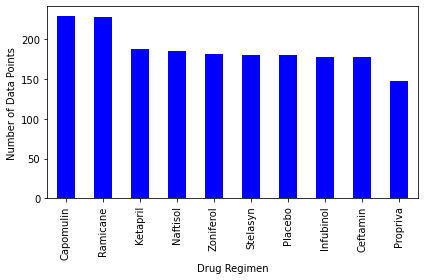

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_groups = new_cleaned_df['Drug Regimen'].value_counts()
drug_groups.plot(kind="bar",
                  facecolor="blue",
                  xlabel="Drug Regimen",
                  ylabel="Number of Data Points",
                  )
plt.tight_layout()
plt.show()

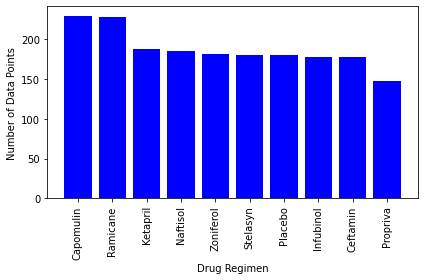

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_groups = new_cleaned_df['Drug Regimen'].value_counts()

plt.bar(drug_groups.index, drug_groups.values, color=('blue'))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Sex'>

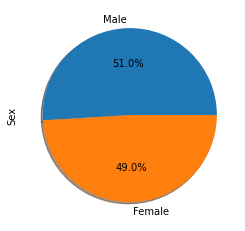

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#males = (new_cleaned_df["Sex"]('males').value_count())
#males
male_female = new_cleaned_df["Sex"].value_counts()
male_female

male_female.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=0)


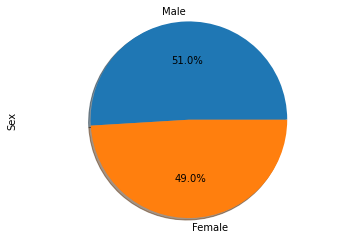

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = new_cleaned_df["Sex"].value_counts()
male_female

plt.pie(male_female, labels=('Male', 'Female'), autopct='%1.1f%%', shadow=True)

plt.axis("equal")

plt.ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = new_cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_groups_df = pd.merge(new_cleaned_df, last_timepoint, on=('Mouse ID', 'Timepoint'), how='right')
merged_groups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows_mice_drug = merged_groups_df.loc[merged_groups_df['Drug Regimen'] == drug][['Tumor Volume (mm3)']]
    tumor_vol_data.append(rows_mice_drug['Tumor Volume (mm3)'])

    # add subset 
    quartiles = rows_mice_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    #print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    upperq = quartiles[0.75]
    #print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    iqr = upperq-lowerq
    #print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    tumor_vol_outliers = rows_mice_drug.loc[(rows_mice_drug['Tumor Volume (mm3)'] < lower_bound) | (rows_mice_drug['Tumor Volume (mm3)'] > upper_bound)]
    tumor_vol_outliers
    #print (f'{drug}s potenital outliers: {tumor_vol_outliers}')

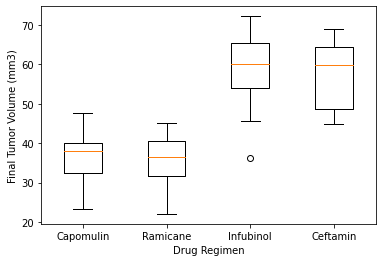

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.boxplot(tumor_vol_data, labels=drug_treatments)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

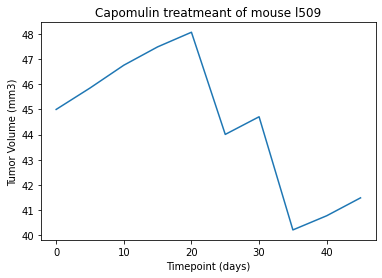

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = new_cleaned_df.loc[new_cleaned_df['Mouse ID'] == "l509"]

mouse_tp = line_plot_df['Timepoint']
mouse_tv = line_plot_df['Tumor Volume (mm3)']

plt.plot(mouse_tp, mouse_tv,)
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

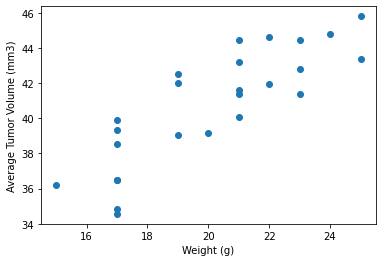

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_treatment_df = new_cleaned_df.loc[new_cleaned_df["Drug Regimen"] == "Capomulin",:]

capo_average = capo_treatment_df.groupby(['Mouse ID']).mean()

plt.scatter(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


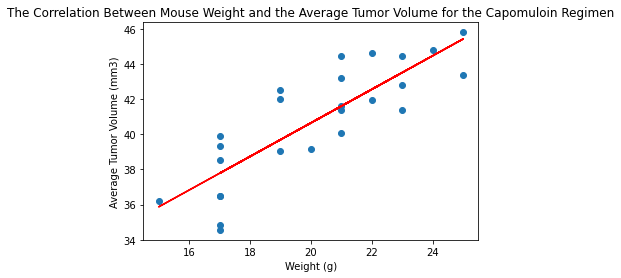

In [51]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_values = capo_average['Weight (g)']
y_values = capo_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("The Correlation Between Mouse Weight and the Average Tumor Volume for the Capomuloin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()